# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
print(api_key)


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

07d7cfb49d3254841a44d88e77e93cf0


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#Create lists to hold data frame variables
temp = []
humidity = []
city_name = []
clouds = []
country = []
latitude = []
wind_speed = []
city_id = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)
lat_lngs = zip(lats, lngs)
print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        print(query_url)
        
        response = requests.get(f'{query_url}').json()
        response

        temp.append(response['main']['temp'])
        temp

        humidity.append(response['main']['humidity'])
        humidity

        clouds.append(response['clouds']['all'])
        clouds

        wind_speed.append(response['wind']['speed'])
        wind_speed
        
        latitude.append(response['coord']['lat'])
        latitude
        
        city_name.append(response['name'])
        city

        city_id.append(response['id'])
        city_id

        print(f'city= {city}, city ID = {city_id}')
        print(city)
        
        time.sleep(1.01)
        
# Print the city count to confirm sufficient count
len(cities)

[ 18.05881916  43.65869706 -41.58767911 -58.11484067  51.75959322] [-127.84588343  -22.90273947   57.78105355 -145.35711352 -145.14288063]
http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= guerrero%20negro, city ID = [4021858]
guerrero%20negro
http://api.openweathermap.org/data/2.5/weather?q=rabo%20de%20peixe&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
city= rabo%20de%20peixe, city ID = [4021858, 3372745]
rabo%20de%20peixe
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial


KeyError: 'main'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
### Convert Raw Data to DataFrame
weather_data = {'Temperature': temp, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'city': city, 'city ID': city_id, 'Latitude': latitude}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()



#* Export the city data into a .csv.
#* Display the DataFrame

,Temperature,Humidity,Cloudiness,Wind Speed,city,city ID,Latitude
0,63.79,79,69,13.69,taolanaro,4021858,27.97
1,69.80,94,20,10.29,taolanaro,3372745,37.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

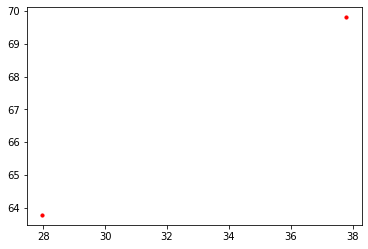

In [10]:
# Fixing random state for reproducibility
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], color = "r", marker="o", s=10)

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature (F)")
plt.title = ("Latitude vs. Temperature")

plt.show()

#### Latitude vs. Humidity Plot

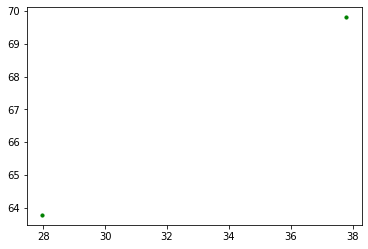

In [11]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], color = "g", marker="o", s=10)

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature (F)")
plt.title = ("Latitude vs. Temperature")

plt.show()

#### Latitude vs. Cloudiness Plot

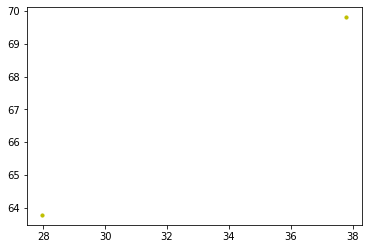

In [12]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperature"], color = "y", marker="o", s=10)

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature (F)")
plt.title = ("Latitude vs. Temperature")

plt.show()

#### Latitude vs. Wind Speed Plot

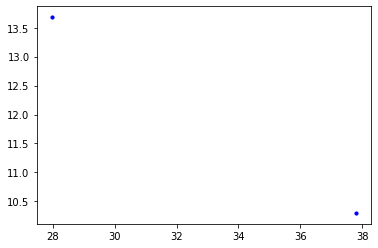

In [13]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o", s=10)

plt.xlabel = ("Latitude")
plt.ylabel = ("Wind Speed")
plt.title = ("Latitude vs. Wind Speed")

plt.show()